# Using Tweepy to Request Twitter API Call

In [1]:

import tweepy
from tweepy import API
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import RateLimitError
from TweepyAuth import consumer_key, consumer_secret, access_token, access_token_secret
import pandas as pd
import re

import plotly.plotly as py
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:

def tweepy_call(c_key, c_secret, a_token, a_token_secret):
    auth = tweepy.OAuthHandler(consumer_key = c_key, consumer_secret = c_secret)
    auth.set_access_token(a_token, a_token_secret)

    api = tweepy.API(auth)
    api.wait_on_rate_limit = True
    api.wait_on_rate_limit_notify = True
    return api

In [3]:
# Connecting to Twitter API using API key set up in TweepyAuth.py
api = tweepy_call(consumer_key, consumer_secret, access_token, access_token_secret)

### Making An API Call For Democratic Presidential Candidate Twitter Information

In [13]:

def get_n_tweets_df(screen_name, n = 10):
    
    """
    get n most recent tweets from screen_name's twitter account to create a pandas dataframe.
    """
    
    wanted_status_keys = ['twitter_handle','id','full_text','created_at','favorite_count','retweet_count','retweeter_ids','entities']
    temp = pd.DataFrame([tweet._json for tweet in Cursor(api.user_timeline, screen_name, tweet_mode = 'extended', include_rts=False).items(n)])
    temp['retweeter_ids'] = temp['id'].map(lambda x:api.retweeters(x))
    temp['twitter_handle'] = screen_name
    return temp[wanted_status_keys]

def add_retweet_geos(df):
    
    """
    get the retweeter location using retweeter_id and append to the dataframe
    """
    
    df['retweeter_geos'] = df['retweeter_ids'].map(lambda x: [get_location_by_id(idnum) for idnum in x])
    return df

def get_location_by_id(idnum):
    
    """
    function called by add_retweet_geos function
    """
    
    return api.get_user(idnum)._json['location']

In [5]:

def build_df_from_api(screen_name, n = 10):
    
    #return n=10 tweets + column of lists of retweeter ids
    df = get_n_tweets_df(screen_name, n)
    #returns user defined locations of retweeters
    df = add_retweet_geos(df)
    return df

In [28]:
buttigieg_df = build_df_from_api('PeteButtigieg', n = 20)
buttigieg_df.head()

Rate limit reached. Sleeping for: 576
Rate limit reached. Sleeping for: 689


,twitter_handle,id,full_text,created_at,favorite_count,retweet_count,retweeter_ids,entities,retweeter_geos
0,PeteButtigieg,1152005819593977857,To come of age in the 21st century is to see v...,Fri Jul 19 00:02:45 +0000 2019,10170,1994,"[1111722455524147201, 32649952, 114873175, 331...","{'hashtags': [], 'symbols': [], 'user_mentions...","[, Los Angeles, Wisconsin, New York, USA, New ..."
1,PeteButtigieg,1151993890745901056,I'm proud to belong to a generation that is th...,Thu Jul 18 23:15:21 +0000 2019,3057,362,"[2777094272, 1126179078225022976, 107626916525...","{'hashtags': [], 'symbols': [], 'user_mentions...","[Nashville, TN, Road to the White House, , , E..."
2,PeteButtigieg,1151993436536393729,"When the people of Puerto Rico speak, we must ...",Thu Jul 18 23:13:32 +0000 2019,10507,1474,"[1111722455524147201, 952273285311496195, 1552...","{'hashtags': [{'text': 'PuertoRico', 'indices'...","[, Martin, TN, Honolulu, HI, , You can't get t..."
3,PeteButtigieg,1151861804475256834,@DerrickNAACP @AprilDRyan @NAACP Thanks! I'm l...,Thu Jul 18 14:30:29 +0000 2019,130,11,"[853711921526128640, 517882331, 1713118033, 95...","{'hashtags': [], 'symbols': [], 'user_mentions...","[, , Baltimore, MD, , 🤖 💭💨, Texas, USA, , Wash..."
4,PeteButtigieg,1151861239963951104,We can do many things at once. This morning th...,Thu Jul 18 14:28:14 +0000 2019,5152,611,"[576796855, 405824789, 1054949677022502912, 86...","{'hashtags': [{'text': 'RaiseTheWage', 'indice...","[3rd most stressed city in US, , , Austin, TX,..."


In [29]:
candidate = [sanders_df, warren_df, biden_df, harris_df, buttigieg_df]
candidate_df = pd.concat(candidate, ignore_index = True)

In [30]:
candidate_df.tail()

,twitter_handle,id,full_text,created_at,favorite_count,retweet_count,retweeter_ids,entities,retweeter_geos
95,PeteButtigieg,1151121466466938881,Thank you to IUPAT DC 91 for inviting me to si...,Tue Jul 16 13:28:39 +0000 2019,2778,364,"[261993066, 1122674748218073088, 1124860852799...","{'hashtags': [], 'symbols': [], 'user_mentions...","[Modesto, CA, , Atlanta, GA, New York, Califor..."
96,PeteButtigieg,1150923319291650048,I've spent years working with South Bend City ...,Tue Jul 16 00:21:17 +0000 2019,5814,676,"[2172537020, 248988259, 261993066, 382418494, ...","{'hashtags': [{'text': 'SouthBendForPete', 'in...","[Dixon, IL, , Modesto, CA, United States, , , ..."
97,PeteButtigieg,1150906220284456960,Employees of the company run by the richest pe...,Mon Jul 15 23:13:20 +0000 2019,9426,1278,"[261993066, 1117699131324059649, 18528411, 277...","{'hashtags': [], 'symbols': [], 'user_mentions...","[Modesto, CA, California, USA, Washington, DC,..."
98,PeteButtigieg,1150897225985339397,"For nearly two decades, we have used military ...",Mon Jul 15 22:37:35 +0000 2019,5873,922,"[261993066, 953096520525479938, 11176991313240...","{'hashtags': [], 'symbols': [], 'user_mentions...","[Modesto, CA, Palo Alto, CA, California, USA, ..."
99,PeteButtigieg,1150783810377781251,"Instead of cutting a ribbon, we de-coupled a f...",Mon Jul 15 15:06:55 +0000 2019,5281,481,"[261993066, 953096520525479938, 87402598987286...","{'hashtags': [], 'symbols': [], 'user_mentions...","[Modesto, CA, Palo Alto, CA, Los Angeles, CA, ..."


In [32]:
candidate_df.to_excel('candidate.xlsx')

### Data Cleaning And Feature Extraction

In [33]:
# candidate_df = pd.read_excel('candidate.xlsx')
candidate_df.head()

,twitter_handle,id,full_text,created_at,favorite_count,retweet_count,retweeter_ids,entities,retweeter_geos
0,SenSanders,1151988986727952385,"Mitch McConnell is wrong. Since 1979, when a s...",Thu Jul 18 22:55:52 +0000 2019,7263,1929,"[28529316, 1111533778667782145, 36445352, 2881...","{'hashtags': [], 'symbols': [], 'user_mentions...","[Queens the Foundation, , Las Vegas, NV, , Yea..."
1,SenSanders,1151934242705805312,I stand with the people of Puerto Rico taking ...,Thu Jul 18 19:18:20 +0000 2019,3503,985,"[1439423954, 3365339207, 213788391, 842383940,...","{'hashtags': [], 'symbols': [], 'user_mentions...","[The bottom , , California, #BoricuaIn305, Pue..."
2,SenSanders,1151897868980105216,"Four years ago, @KeithEllison and I rallied wi...",Thu Jul 18 16:53:47 +0000 2019,2911,556,"[1144038118955323392, 521996289, 1133939629105...","{'hashtags': [], 'symbols': [], 'user_mentions...","[, United States, Cascadia, Mayagüez, Puerto R..."
3,SenSanders,1151876586242752512,After supporting a huge increase in military s...,Thu Jul 18 15:29:13 +0000 2019,2069,564,"[1043257221528858624, 1137823049355583488, 849...","{'hashtags': [], 'symbols': [], 'user_mentions...","[Mayagüez, Puerto Rico, , , Philadephia, PA, L..."
4,SenSanders,1151871268351873026,"Remember when $15 an hour was ""radical""? Not s...",Thu Jul 18 15:08:05 +0000 2019,3292,670,"[768805384610086912, 1133939629105848321, 1581...","{'hashtags': [], 'symbols': [], 'user_mentions...","[, Cascadia, , Philadephia, PA, SG💕🌹, , , part..."


In [35]:
candidate_df.loc[candidate_df["twitter_handle"] == 'SenSanders']["full_text"][0]

'Mitch McConnell is wrong. Since 1979, when a state has increased the min. wage, employment and wages typically go up, not down. A $15 minimum wage would raise wages for 39 million people and lift millions of Americans out of poverty. Why is McConnell afraid to let us vote on it? https://t.co/CDraIzKFki'

In [36]:
candidate_df.loc[candidate_df["twitter_handle"] == 'SenSanders']["entities"][0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [{'url': 'https://t.co/CDraIzKFki',
   'expanded_url': 'https://twitter.com/senatemajldr/status/1151885990862237697',
   'display_url': 'twitter.com/senatemajldr/s…',
   'indices': [280, 303]}]}

In [43]:
candidate_df.loc[candidate_df["twitter_handle"] == 'SenSanders'].entities.apply(lambda x: x['urls'])

0     [{'url': 'https://t.co/CDraIzKFki', 'expanded_...
1     [{'url': 'https://t.co/sSUu0n09MY', 'expanded_...
2                                                    []
3     [{'url': 'https://t.co/c6o1mavPFI', 'expanded_...
4     [{'url': 'https://t.co/tS7u9zeBgf', 'expanded_...
5                                                    []
6     [{'url': 'https://t.co/aPO6nUAIKq', 'expanded_...
7     [{'url': 'https://t.co/hbSgxeM4za', 'expanded_...
8                                                    []
9                                                    []
10                                                   []
11                                                   []
12    [{'url': 'https://t.co/OE76mJcjjs', 'expanded_...
13                                                   []
14                                                   []
15                                                   []
16                                                   []
17                                              

In [44]:
candidate_df.loc[candidate_df["twitter_handle"] == 'SenSanders'].entities[7]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [{'url': 'https://t.co/hbSgxeM4za',
   'expanded_url': 'https://twitter.com/letsgomathias/status/1151126203597807617',
   'display_url': 'twitter.com/letsgomathias/…',
   'indices': [136, 159]}]}

In [46]:
candidate_df.loc[candidate_df["twitter_handle"] == 'SenSanders'].full_text.apply(lambda x: x[-23:])

0     https://t.co/CDraIzKFki
1     https://t.co/sSUu0n09MY
2     https://t.co/UZLQvFPwHE
3     https://t.co/c6o1mavPFI
4     https://t.co/tS7u9zeBgf
5     history of our country.
6     https://t.co/aPO6nUAIKq
7     https://t.co/hbSgxeM4za
8     great state of Vermont.
9     https://t.co/3aaIAZvG5X
10    fair. We will miss him.
11     has dominated the GOP.
12    https://t.co/OE76mJcjjs
13     today I felt the burn.
14    https://t.co/05FNsGx5fu
15    https://t.co/LNgoi1XuFB
16    https://t.co/QY9GJT4mTk
17    https://t.co/p11YE61HHx
18    https://t.co/GxagHx70pb
19    https://t.co/HkC77UOyWA
Name: full_text, dtype: object

In [47]:
candidate_df.loc[candidate_df["twitter_handle"] == 'SenSanders'].retweeter_geos[0]

['Queens the Foundation',
 '',
 'Las Vegas, NV',
 '',
 'Yeah',
 '',
 'Colorado, USA',
 'Hobbs Lane S.W.1.',
 '',
 '',
 'Cascadia',
 '',
 '',
 '',
 'East Midlands, England',
 '',
 'Tampa FL',
 'https://justicedemocrats.com/',
 'Allentown, PA',
 'The Milky Way Galaxy | Los Angeles, CA',
 'CANada',
 'Texas',
 "at your mom's house",
 'Seattle, WA',
 'Cutesville, USA',
 '',
 '',
 'Beautiful Vista',
 'Crystal Lake, IL',
 'Los Angeles, CA',
 'Boise, ID',
 'Memphis, TN',
 '',
 '',
 '',
 'Thunder Bay Ontario Canada',
 'Washington, USA',
 'Spring Hill, FL',
 '',
 'New York, USA',
 '',
 'Plano, TX',
 'San Diego',
 'Ciudad de México',
 'Staten Island, NY',
 'Tucson, AZ',
 '',
 'San Francisco, CA',
 '',
 'California',
 'Detroit, MI.',
 'Clayton, OH',
 'haha okay fbi (MN)',
 'Scottsdale, AZ',
 '',
 'South-West London',
 '',
 'Kenya',
 '',
 'Vancouver, British Columbia',
 'Santa Monica, CA',
 'North Carolina',
 'Earth',
 'Austin, Texas',
 '',
 'Kansas, #PaleBlueDot',
 'Washington, DC',
 '',
 '',
 '',

In [48]:
len(candidate_df.loc[candidate_df["twitter_handle"] == 'SenSanders'].retweeter_geos[0])

91

In [49]:
candidate_df.loc[candidate_df["twitter_handle"] == 'SenSanders'].retweeter_geos[0].count('')

32

In [50]:

def single_word_name(state):
    
    """
    eliminates space after given keywords
    """
    
    state = re.sub(r'north[ ]','north',state)
    state = re.sub(r'south[ ]','south',state)
    state = re.sub(r'west[ ]','west',state)
    state = re.sub(r'new[ ]','new',state)
    return state

def get_real_location(location):
    
    """
    parse out location information by state 
    """
    
    #normalizing input, separating into list
    shorten = single_word_name(location.replace(',','').lower())
    possible_locations = shorten.split()

    #filtering for words that show up in our list of acceptable_terms
    retweeter_states = [word for word in possible_locations if word in acceptable_terms]

    #return key (ex 'NY' for 'new york') if associated value is found in retweeter_states
    result = ''
    for state, terms in acceptable_names.items():
         for item in terms:
                if item in retweeter_states:
                    result += state
    #HACK ALERT: if more than 1 associated key found (ex: 'california new york'-->'CANY', only returns 1 key (alphabetically)
    return result[:2]

def state_parser(location_tags):
    
    """
    make a list of all location by state
    """
    
    return list(filter(None,[get_real_location(name) for name in location_tags]))

def state_counter(states):
    
    """
    get a tally of all the states in a list
    """
    
    counter={}
    for state in states:
        if state in counter:
            counter[state] += 1
        else:
            counter[state] = 1
    return counter

def group_by_states(states):
    
    """
    iterate through every row to tally up states and return a pandas series of states
    """
    
    counter = {}
    for pairs in states:
        for state, num in pairs.items():
            if state in counter:
                counter[state] += num
            else:
                counter[state] = num
    return pd.Series(counter)

def percent_by_states(srs):
    
    """
    return a dataframe with count and percentage of all locations by state
    """
    
    newdf = pd.DataFrame({'counts':srs})
    newdf['pcts'] = newdf['counts'].apply(lambda x: round(x/newdf['counts'].sum()*100,2))
    return newdf.sort_index()

In [51]:

def add_features(df):
    
    """
    add 2 columns that parses out the information of retweeter_geos
    """
    
    #add column of cleaned up locations
    df['parsed_locs'] = df['retweeter_geos'].map(lambda x: state_parser(x))
    
    #add column of location count as dictionary
    df['rt_loc_counts'] = df['parsed_locs'].map(lambda x: state_counter(x))
    return df

def map_visualization_data(df):
    
    
    #collapse rows of dictionaries to summation series where each row is a dictionary key
    state_series = group_by_states(df['rt_loc_counts'])
    
    #adds percentage column which coerces to df
    newdf = percent_by_states(state_series)
    
    #adds copy of index as column to facilitate working with plotly
    newdf['codes'] = newdf.index
    newdf['text'] = 'Count: '+newdf['counts'].astype(str)+' '+'Percentage: '+newdf['pcts'].astype(str)
    return newdf

In [52]:
#setup for variable in get_real_location function

acceptable_names = {
    'AL':['al','alabama'],
    'AK':['ak','alaska'], 
    'AZ':['az','arizona'], 
    'AR':['ar','arkansas'], 
    'CA':['ca','california','cal','cali'], 
    'CO':['co','colorado'], 
    'CT':['ct','connecticut'], 
    'DE':['de','delaware'], 
    'FL':['fl','florida'], 
    'GA':['ga','georgia'], 
    'HI':['hi','hawaii'], 
    'ID':['id','idaho'], 
    'IL':['il','illinois'], 
    'IN':['in','indiana'], 
    'IA':['ia','iowa'], 
    'KS':['ks','kansas'], 
    'KY':['ky','kentucky'], 
    'LA':['la','louisiana'], 
    'ME':['me','maine'], 
    'MD':['md','maryland'], 
    'MA':['ma','massachusetts'], 
    'MI':['mi','michigan'], 
    'MN':['mn','minnesota'], 
    'MS':['ms','mississippi'], 
    'MO':['mo','missouri'], 
    'MT':['mt','montana'],
    'NE':['ne','nebraska'], 
    'NV':['nv','nevada'], 
    'NH':['nh','newhampshire'], 
    'NJ':['nj','newjersey','jersey'], 
    'NM':['nm','newmexico'], 
    'NY':['ny','newyork','nyc'],
    'NC':['nc','northcarolina'],
    'ND':['nd','northdakota'],
    'OH':['oh','ohio'],
    'OK':['ok','oklahoma'],
    'OR':['or','oregon'],
    'PA':['pa','pennsylvania'],
    'RI':['ri','rhodeisland','rhode'],
    'SC':['sc','southcarolina'],
    'SD':['sd','southdakota'],
    'TN':['tn','tennessee'],
    'TX':['tx','texas'],
    'UT':['ut','utah'],
    'VT':['vt','vermont'],
    'VA':['va','virginia'],
    'WA':['wa','washington'],
    'WV':['wv','westvirginia'],
    'WI':['wi','wisconsin'],
    'WY':['wy','wyoming'],
}

#unpacking/melting above dictionary to list for direct access

acceptable_terms = []
for each in acceptable_names.values():
    acceptable_terms.extend(each)

In [53]:
candidate_df = add_features(candidate_df)
candidate_df.head()

,twitter_handle,id,full_text,created_at,favorite_count,retweet_count,retweeter_ids,entities,retweeter_geos,parsed_locs,rt_loc_counts
0,SenSanders,1151988986727952385,"Mitch McConnell is wrong. Since 1979, when a s...",Thu Jul 18 22:55:52 +0000 2019,7263,1929,"[28529316, 1111533778667782145, 36445352, 2881...","{'hashtags': [], 'symbols': [], 'user_mentions...","[Queens the Foundation, , Las Vegas, NV, , Yea...","[NV, CO, FL, PA, CA, TX, WA, IL, CA, ID, TN, W...","{'NV': 1, 'CO': 1, 'FL': 2, 'PA': 1, 'CA': 5, ..."
1,SenSanders,1151934242705805312,I stand with the people of Puerto Rico taking ...,Thu Jul 18 19:18:20 +0000 2019,3503,985,"[1439423954, 3365339207, 213788391, 842383940,...","{'hashtags': [], 'symbols': [], 'user_mentions...","[The bottom , , California, #BoricuaIn305, Pue...","[CA, AK, CA, KS, NY, NY, DE, FL, CA, CA, DE, T...","{'CA': 4, 'AK': 1, 'KS': 1, 'NY': 2, 'DE': 2, ..."
2,SenSanders,1151897868980105216,"Four years ago, @KeithEllison and I rallied wi...",Thu Jul 18 16:53:47 +0000 2019,2911,556,"[1144038118955323392, 521996289, 1133939629105...","{'hashtags': [], 'symbols': [], 'user_mentions...","[, United States, Cascadia, Mayagüez, Puerto R...","[CO, PA, NJ, WA, IA, VA, CA, WA, CA, IN, NV, I...","{'CO': 1, 'PA': 1, 'NJ': 1, 'WA': 4, 'IA': 1, ..."
3,SenSanders,1151876586242752512,After supporting a huge increase in military s...,Thu Jul 18 15:29:13 +0000 2019,2069,564,"[1043257221528858624, 1137823049355583488, 849...","{'hashtags': [], 'symbols': [], 'user_mentions...","[Mayagüez, Puerto Rico, , , Philadephia, PA, L...","[PA, KS, FL, CA, CA, IN, NY, NY, MS, TX, CA, N...","{'PA': 2, 'KS': 1, 'FL': 1, 'CA': 8, 'IN': 1, ..."
4,SenSanders,1151871268351873026,"Remember when $15 an hour was ""radical""? Not s...",Thu Jul 18 15:08:05 +0000 2019,3292,670,"[768805384610086912, 1133939629105848321, 1581...","{'hashtags': [], 'symbols': [], 'user_mentions...","[, Cascadia, , Philadephia, PA, SG💕🌹, , , part...","[PA, FL, CA, GA, AZ, IN, NY, NJ, TX, TX, ID, N...","{'PA': 2, 'FL': 1, 'CA': 8, 'GA': 2, 'AZ': 1, ..."


In [64]:
buttigieg_plotly = map_visualization_data(candidate_df.loc[candidate_df['twitter_handle']=='PeteButtigieg'])
buttigieg_plotly['twitter_handle'] = "PeteButtigieg"
buttigieg_plotly

,counts,pcts,codes,text,twitter_handle
AL,10,1.27,AL,Count: 10 Percentage: 1.27,PeteButtigieg
AR,6,0.76,AR,Count: 6 Percentage: 0.76,PeteButtigieg
AZ,25,3.17,AZ,Count: 25 Percentage: 3.17,PeteButtigieg
CA,135,17.11,CA,Count: 135 Percentage: 17.11,PeteButtigieg
CO,16,2.03,CO,Count: 16 Percentage: 2.03,PeteButtigieg
CT,5,0.63,CT,Count: 5 Percentage: 0.63,PeteButtigieg
DE,10,1.27,DE,Count: 10 Percentage: 1.27,PeteButtigieg
FL,34,4.31,FL,Count: 34 Percentage: 4.31,PeteButtigieg
GA,10,1.27,GA,Count: 10 Percentage: 1.27,PeteButtigieg
HI,14,1.77,HI,Count: 14 Percentage: 1.77,PeteButtigieg


In [65]:
candidate_py = [sanders_plotly, warren_plotly, biden_plotly, harris_plotly, buttigieg_plotly]
candidate_plotly = pd.concat(candidate_py, ignore_index = True)

In [84]:
candidate_plotly.to_excel("CandidatePlotly.xlsx")

### Data Visualization

In [75]:
def plotly_compiler(df):
    data = [dict(
        type='choropleth',
        autocolorscale = True,
        locations = df['codes'],
        z = df['counts'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2))
    )]
    layout = dict(
        title = 'RT Map',
        geo = dict(
            scope='usa',
            projection = dict(type = 'albers usa'),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'
        )
    )
    fig = dict(data = data, layout = layout)
    return fig

def plotly_plot(df,title):
    return py.iplot(plotly_compiler(df), filename = title)

In [113]:
import plotly.plotly as py

In [119]:
plotly_plot(buttigieg_plotly, "Buttigieg Retweet Map")

In [245]:
def fave_retweet_histogram(candidate_df):
    
    
    plt.style.use('seaborn')

    names = candidate_df.twitter_handle.unique().tolist()
    df_list = [candidate_df.loc[candidate_df['twitter_handle'] == name].reset_index(drop=True) for name in names]
    figure, axes = plt.subplots(5, figsize = [12, 30], constrained_layout = True)
    
    pos = list(range(len(df_list[0]['favorite_count']))) 
    width = 0.4 
    
    
    for ax, name, df in zip(axes, names, df_list):
        ax.bar(pos, df['favorite_count'], width, color = 'burlywood', alpha = 0.7, )
        ax.bar([p + width for p in pos], df['retweet_count'], width, color = 'steelblue', alpha = 0.7)
        ax.set_xlabel("Index of Tweets")
        ax.set_ylabel("Count")
    
        ax.set_xticks([p + 0.5 * width for p in pos])
        ax.set_xticklabels(df.index)
        ax.set_title(f"{name}'s Tweets")
        ax.legend(['favorite', 'retweet'])
    
    plt.grid()
    plt.show()

def retweet_histogram(candidate_df):
    
    
    plt.style.use('seaborn')
    
    retweet_states = []
    
    names = candidate_df.twitter_handle.unique().tolist()
    df_list = [candidate_df.loc[candidate_df['twitter_handle'] == name] for name in names]
    for dem_df in df_list:
        retweet_states.append(dem_df['rt_loc_counts'][dem_df['retweet_count'].idxmax()])

    figure, axes = plt.subplots(5, figsize = [12, 30], constrained_layout = True)
    
    for ax, name, rt_state in zip(axes, names, retweet_states):
        rt_state = dict(sorted(rt_state.items(), key = lambda kv: kv[1], reverse = True))
        ax.bar(rt_state.keys(), rt_state.values(), color = 'burlywood', alpha = 0.7)
        ax.set_xlabel('US States')
        ax.set_ylabel('Retweeter Count')
        ax.set_title(name)
        ax.set_xticks(range(len(rt_state.keys())), rt_state.keys())
        
    plt.grid()   
    plt.show()


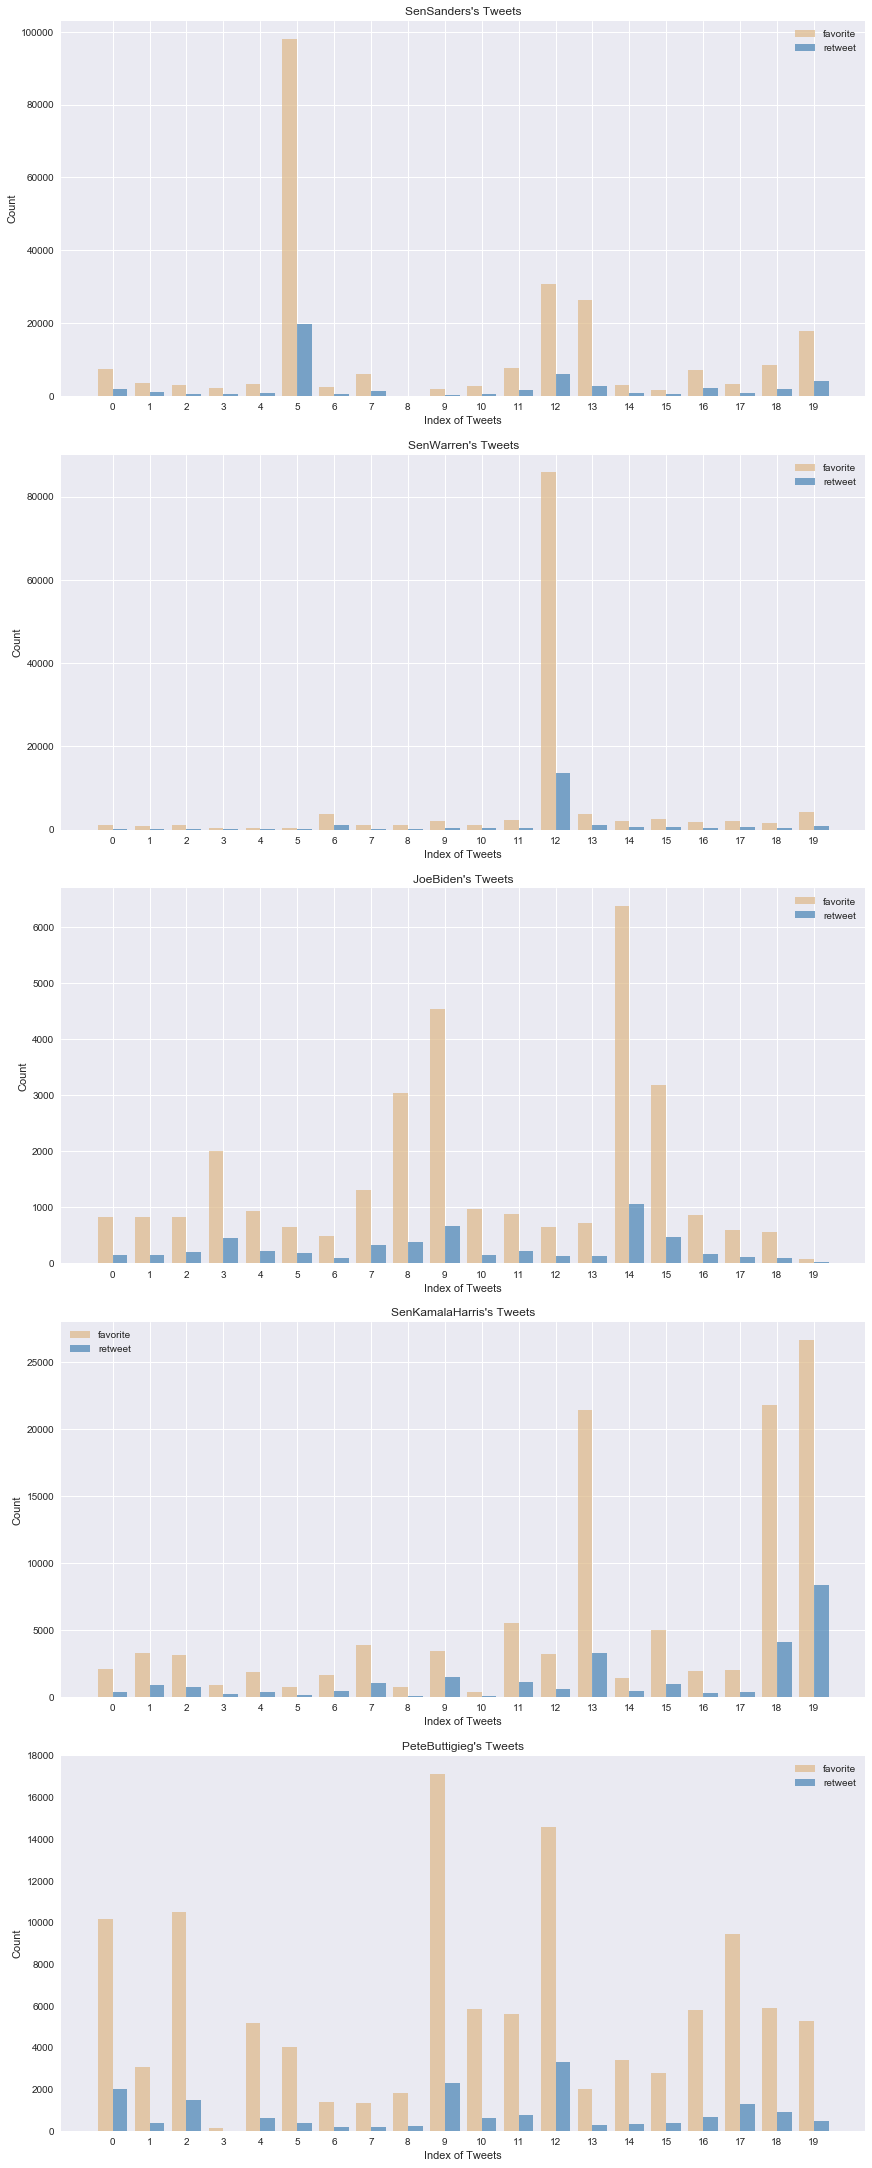

In [246]:
fave_retweet_histogram(candidate_df)

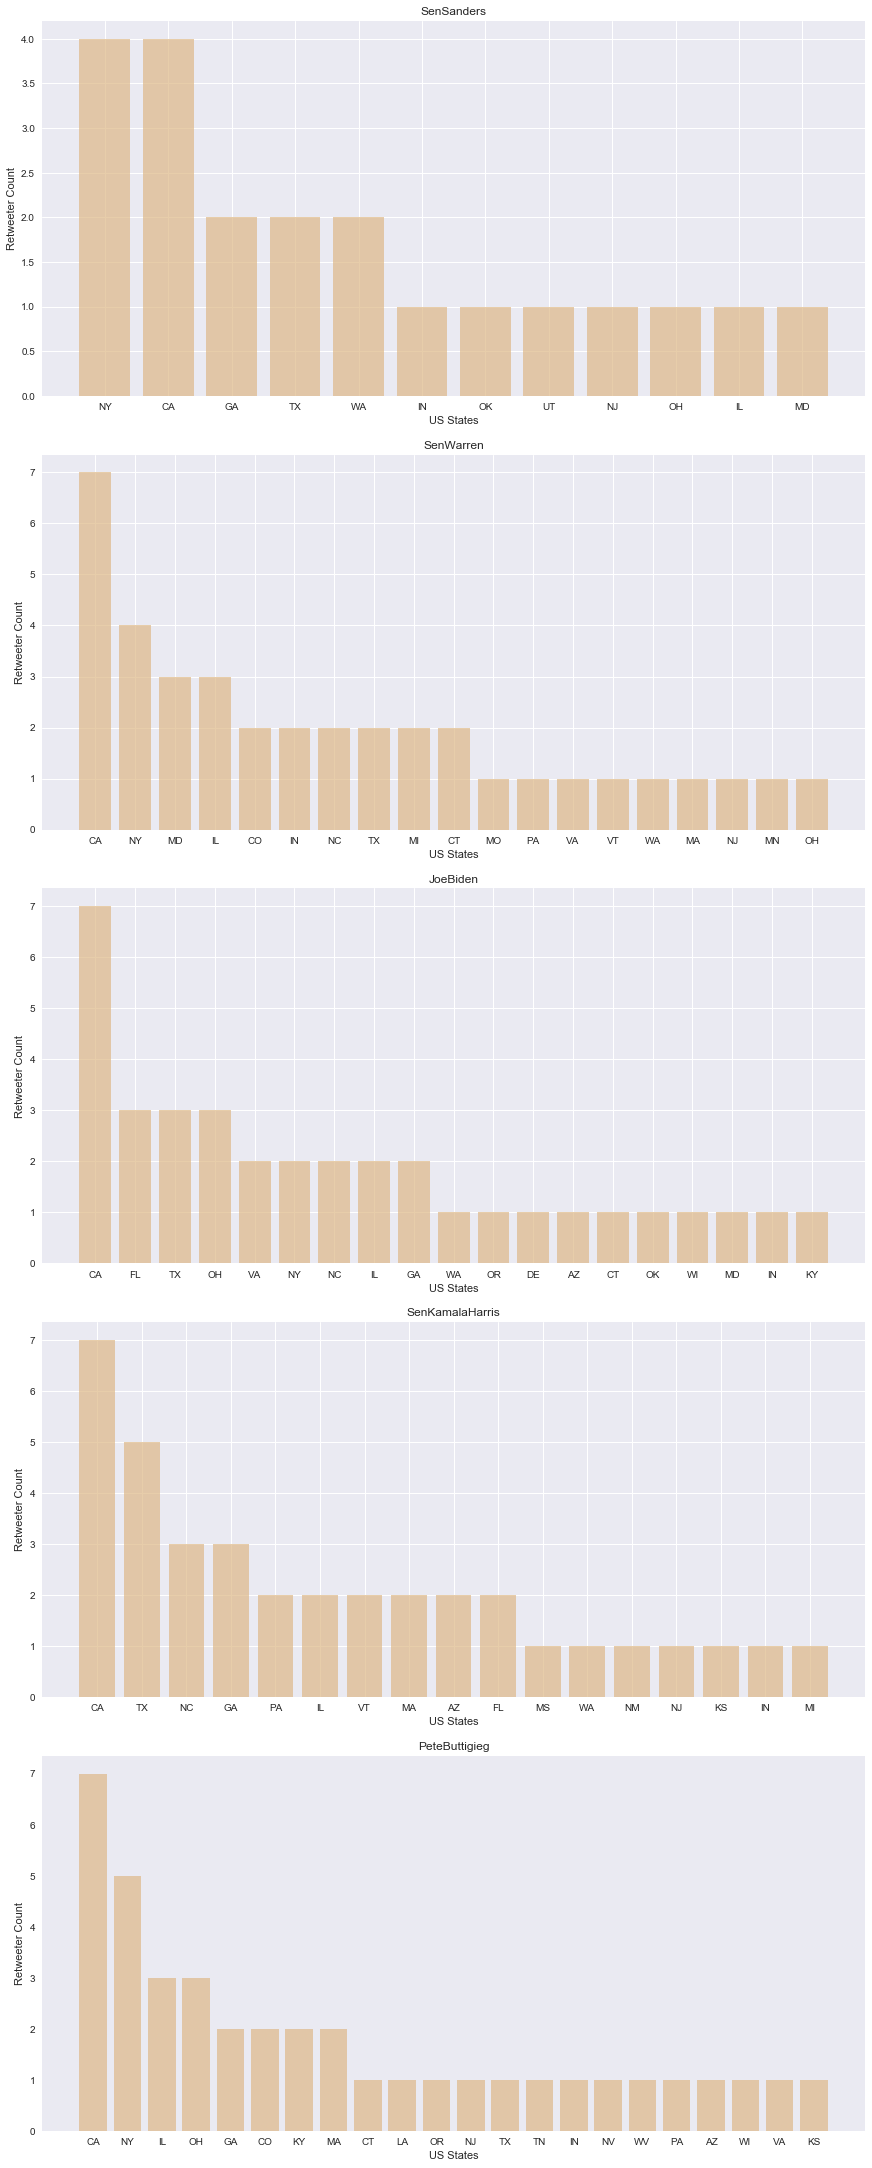

In [244]:
retweet_histogram(candidate_df)